In [1]:
%pip install transformers timm torch pillow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 1.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 1.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.9/63.9 MB 1.2 MB/s eta 0:00:0000:0100:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 1.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 1.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 1.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 1.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.2/536.2 kB 1.2 MB/s eta 0:00:0000:010m
Note: you may need to restart the kernel to use updated packages.


In [1]:
%pip install torch torchvision timm pillow pandas

  Using cached torchvision-0.20.1-cp312-cp312-win_amd64.whl.metadata (6.2 kB)
  Using cached timm-1.0.14-py3-none-any.whl.metadata (50 kB)
  Using cached huggingface_hub-0.27.1-py3-none-any.whl.metadata (13 kB)
Using cached torchvision-0.20.1-cp312-cp312-win_amd64.whl (1.6 MB)
Using cached timm-1.0.14-py3-none-any.whl (2.4 MB)
Using cached huggingface_hub-0.27.1-py3-none-any.whl (450 kB)
Note: you may need to restart the kernel to use updated packages.


In [1]:
from PIL import Image
import timm
import torch

/Users/mac/Git/ml-experiments/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/mac/Git/ml-experiments/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
# CUDA 지원 pytorch 설치치

%pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118


Looking in indexes: https://download.pytorch.org/whl/cu118Note: you may need to restart the kernel to use updated packages.


  You can safely remove it manually.



     ---------------------------------------- 0.0/4.0 MB ? eta -:--:--
     ---------------------------------------- 4.0/4.0 MB 47.7 MB/s eta 0:00:00
     ---------------------------------------- 0.0/2.7 GB ? eta -:--:--
     ---------------------------------------- 0.0/2.7 GB 60.4 MB/s eta 0:00:45
     ---------------------------------------- 0.0/2.7 GB 59.9 MB/s eta 0:00:45
      --------------------------------------- 0.0/2.7 GB 59.3 MB/s eta 0:00:45
      --------------------------------------- 0.0/2.7 GB 59.3 MB/s eta 0:00:45
      --------------------------------------- 0.1/2.7 GB 59.3 MB/s eta 0:00:45
     - -------------------------------------- 0.1/2.7 GB 59.1 MB/s eta 0:00:45
     - -------------------------------------- 0.1/2.7 GB 59.2 MB/s eta 0:00:45
     - -------------------------------------- 0.1/2.7 GB 59.2 MB/s eta 0:00:44
     - -------------------------------------- 0.1/2.7 GB 59.2 MB/s eta 0:00:44
     - -------------------------------------- 0.1/2.7 GB 59.2 MB/s 

In [5]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# 전처리 파이프 라인
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# 데이터셋 로드
train_dataset = datasets.ImageFolder(root='pokemon-dataset-1000/train', transform=transform)
val_dataset = datasets.ImageFolder(root='pokemon-dataset-1000/val', transform=transform)
test_dataset = datasets.ImageFolder(root='pokemon-dataset-1000/test', transform=transform)

# DataLoader 생성
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=128, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

In [6]:
import timm

# 모델 초기화
model = timm.create_model('mobilenetv3_large_100', pretrained=True, num_classes=len(train_dataset.classes))

# 모델을 GPU로 이동 (가능한 경우)
print(torch.cuda.is_available())
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# # Apple Silicon
# # GPU 설정
# device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")

# # 모델을 GPU 또는 CPU로 이동
# model = model.to(device)

True


In [7]:
import torch.nn as nn
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [9]:
# 훈련 및 검증
for epoch in range(50):  # 에포크 수
    model.train()
    train_loss = 0.0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    print(f"Epoch {epoch+1}, Training Loss: {train_loss/len(train_loader)}")

    # 검증
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f"Validation Loss: {val_loss/len(val_loader)}, Accuracy: {100 * correct/total:.2f}%")

Epoch 1, Training Loss: 0.1755862826163449
Validation Loss: 19.82950160377904, Accuracy: 1.89%
Epoch 2, Training Loss: 0.03849138785437567
Validation Loss: 21.255650168971012, Accuracy: 1.85%
Epoch 3, Training Loss: 0.01855664929693065
Validation Loss: 22.002721686112253, Accuracy: 1.85%
Epoch 4, Training Loss: 0.02471601174826302
Validation Loss: 20.632541706687526, Accuracy: 1.85%
Epoch 5, Training Loss: 0.06935453419460029
Validation Loss: 20.389794951991032, Accuracy: 1.68%
Epoch 6, Training Loss: 0.08184027184005373
Validation Loss: 21.43426423323782, Accuracy: 1.81%
Epoch 7, Training Loss: 0.04763181242103711
Validation Loss: 23.49187223534835, Accuracy: 1.85%
Epoch 8, Training Loss: 0.025688920473174486
Validation Loss: 23.178864328484785, Accuracy: 1.85%
Epoch 9, Training Loss: 0.02519403373689118
Validation Loss: 24.203987573322497, Accuracy: 1.85%
Epoch 10, Training Loss: 0.03602458994548836
Validation Loss: 23.66685470781828, Accuracy: 1.81%
Epoch 11, Training Loss: 0.045259

In [10]:
# 테스트 데이터로 평가
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Test Accuracy: {100 * correct/total:.2f}%")

# 모델 저장
torch.save(model.state_dict(), "trained_model.pth")

Test Accuracy: 99.04%


In [ ]:
#모델 불러오기

import torch
import timm

# 모델 초기화
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = timm.create_model('mobilenetv3_large_100', pretrained=False, num_classes=len(train_dataset.classes))
model = model.to(device)

# 저장된 가중치 불러오기
model.load_state_dict(torch.load("trained_model.pth", map_location=device))

# 모델 평가 모드 설정
model.eval()

print("Model weights successfully loaded!")


In [12]:
%pip install matplotlib


   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------------------------------------- 8.0/8.0 MB 49.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 41.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


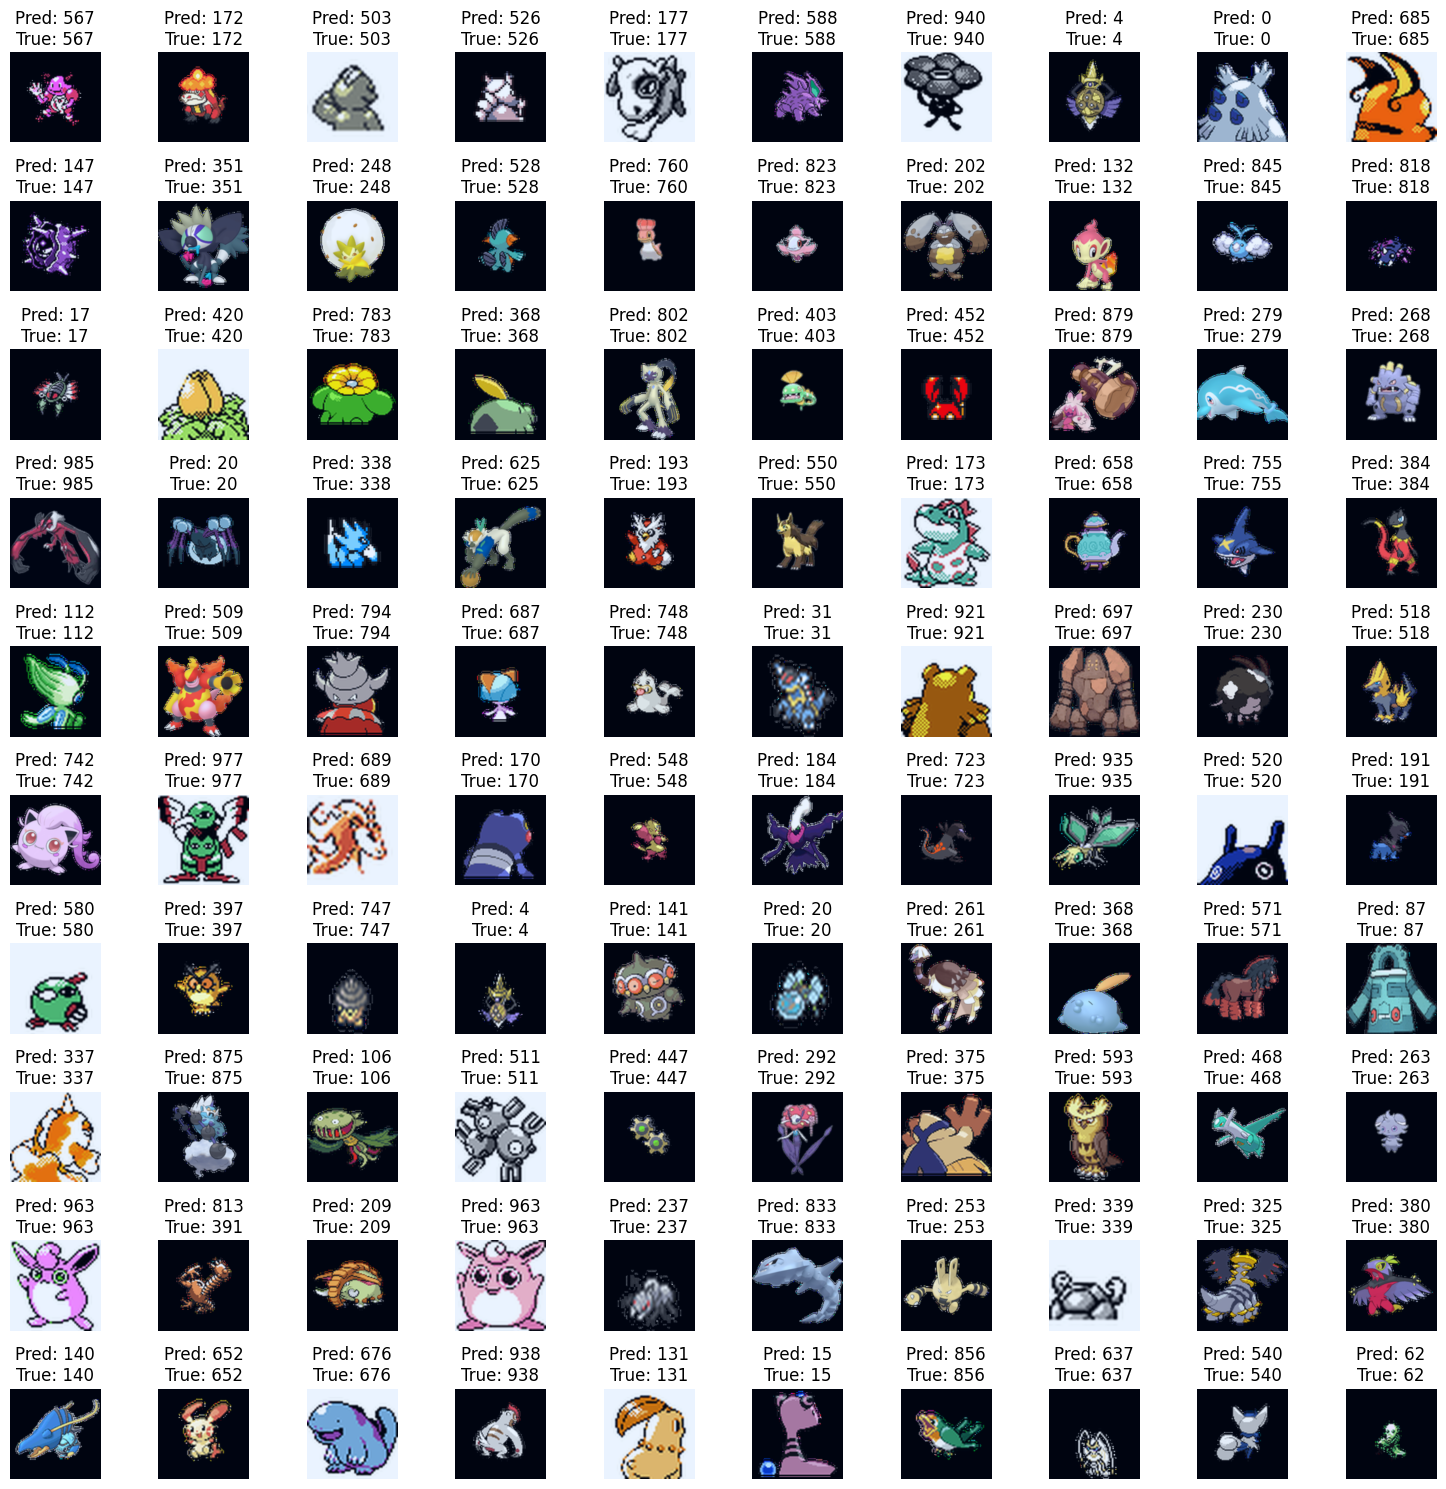

Accuracy: 99.00%


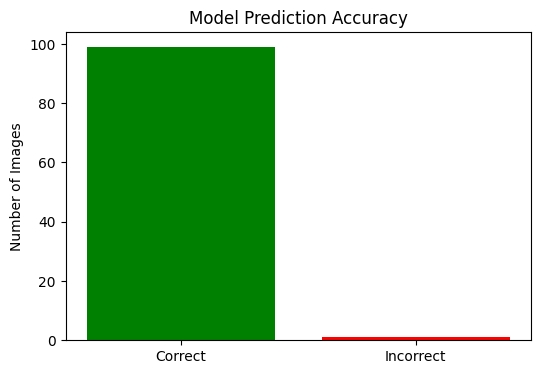

In [13]:
import random
import matplotlib.pyplot as plt
import torch

# 랜덤 샘플 100개 추출
num_samples = 100
random_indices = random.sample(range(len(test_loader.dataset)), num_samples)

# 테스트 데이터셋에서 랜덤 샘플 가져오기
images, labels = [], []
for idx in random_indices:
    img, lbl = test_loader.dataset[idx]
    images.append(img)
    labels.append(lbl)

# 이미지를 모델 입력 형식으로 변환
images_tensor = torch.stack(images).to(device)
labels_tensor = torch.tensor(labels).to(device)

# 모델 예측
model.eval()
with torch.no_grad():
    outputs = model(images_tensor)
    _, predicted = torch.max(outputs, 1)

# 결과 시각화 (10x10 그리드로 출력)
fig, axes = plt.subplots(10, 10, figsize=(15, 15))
axes = axes.ravel()

# 정확도 계산용 변수
correct_count = 0

for i in range(num_samples):
    # 이미지를 [0, 1] 범위로 변환
    img = images[i].permute(1, 2, 0).cpu().numpy()
    img = (img - img.min()) / (img.max() - img.min())
    
    # 시각화
    axes[i].imshow(img)
    pred_label = predicted[i].item()
    true_label = labels[i]
    
    # 정확도 계산
    if pred_label == true_label:
        correct_count += 1  # 맞춘 경우 카운트 증가
    
    axes[i].set_title(f"Pred: {pred_label}\nTrue: {true_label}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

# 정확도 계산 및 출력
accuracy = correct_count / num_samples * 100
print(f"Accuracy: {accuracy:.2f}%")

# 바 차트로 정확도 표현
plt.figure(figsize=(6, 4))
plt.bar(["Correct", "Incorrect"], [correct_count, num_samples - correct_count], color=["green", "red"])
plt.title("Model Prediction Accuracy")
plt.ylabel("Number of Images")
plt.xticks(rotation=0)
plt.show()

In [18]:
import pandas as pd
from torchvision.datasets import DatasetFolder
from torchvision.io import read_image

# CSV 로드
metadata = pd.read_csv('pokemon-dataset-1000\metadata.csv')

# 필요 시 Dataset 클래스를 커스터마이징하여 CSV 기반으로 데이터 로드 가능

<>:6: SyntaxWarning: invalid escape sequence '\m'
<>:6: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Home\AppData\Local\Temp\ipykernel_32480\515262231.py:6: SyntaxWarning: invalid escape sequence '\m'
  metadata = pd.read_csv('pokemon-dataset-1000\metadata.csv')


In [ ]:
def predict_with_ImageNetv4(img):
    

In [ ]:
root = "C:\Users\Home\Downloads\resized_image_244x244.png"

train_dataset = datasets.ImageFolder(root='pokemon-dataset-1000/train', transform=transform)
images_tensor = torch.stack(images).to(device)

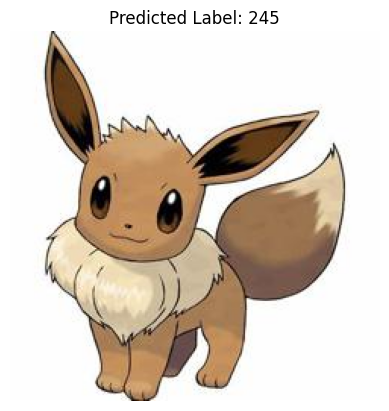

Predicted Label Index: 245
Predicted Label Name: eevee


In [20]:
import matplotlib.pyplot as plt
import torch
from PIL import Image
from torchvision import transforms

# 이미지 경로
image_path = r"C:\Users\Home\Downloads\pokemon_resized_244x244.jpg"

# 모델 입력에 맞는 전처리 파이프라인
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# 이미지 로드 및 전처리
image = Image.open(image_path).convert("RGB")
input_tensor = transform(image).unsqueeze(0).to(device)  # 배치 차원 추가

# 모델 예측
model.eval()
with torch.no_grad():
    output = model(input_tensor)
    _, predicted_label = torch.max(output, 1)

# 결과 시각화
plt.imshow(image)
plt.title(f"Predicted Label: {predicted_label.item()}")
plt.axis('off')
plt.show()

# 고유 라벨 이름과 번호 매핑
label_to_index = {label: idx for idx, label in enumerate(metadata['label'].unique())}
index_to_label = {idx: label for label, idx in label_to_index.items()}

# 모델의 예측 결과를 라벨 이름으로 변환하는 함수
def get_label_name(label_index):
    return index_to_label.get(label_index, "Unknown Label")

# 테스트: 모델 예측 결과 예시
predicted_label_index = predicted_label.item()  # 모델 예측값
predicted_label_name = get_label_name(predicted_label_index)

print(f"Predicted Label Index: {predicted_label_index}")
print(f"Predicted Label Name: {predicted_label_name}")
